# Exercise 3.3: MLP basics with sklearn

Advanced Machine Learning for KCS

by Stefan Heinrich, Stella Grasshof, Laura Weihl
with material by Kevin Murphy

All info and static material: https://learnit.itu.dk/course/view.php?id=3021295

-------------------------------------------------------------------------------

In [737]:
from IPython.display import display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neural_network
import seaborn as sns

#### Loading Iris dataset with seaborn


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


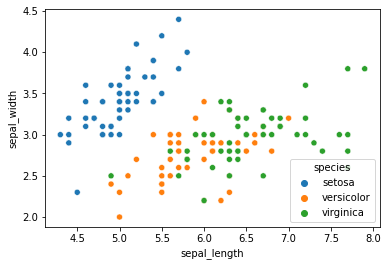

In [738]:
iris_df = sns.load_dataset("iris")

display(iris_df.head(n=3))

plot_raw = sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'],
                           hue=iris_df['species'])

#### Run logistic regression via sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


[[3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 ...
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]]
[[1.5  1.5  1.5  ... 1.5  1.5  1.5 ]
 [1.52 1.52 1.52 ... 1.52 1.52 1.52]
 [1.54 1.54 1.54 ... 1.54 1.54 1.54]
 ...
 [4.86 4.86 4.86 ... 4.86 4.86 4.86]
 [4.88 4.88 4.88 ... 4.88 4.88 4.88]
 [4.9  4.9  4.9  ... 4.9  4.9  4.9 ]]


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


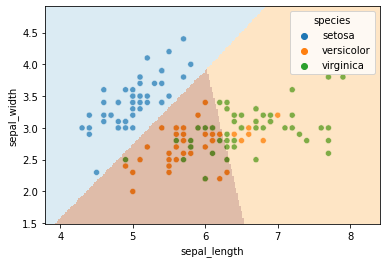

In [739]:
# Create an instance of Logistic Regression Classifier and fit the data.
r_strength = 100000  # Inverse of regularization strength in [1,Inf]
l_solver = 'newton-cg'  # Optimisation algorithm in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
m_class = 'multinomial'  # see documentation

logreg = LogisticRegression(C=r_strength, solver=l_solver,
                            multi_class=m_class)

# directly access iris_df['sepal_length'] and iris_df['sepal_width']
iris_df_inputs = iris_df[['sepal_length', 'sepal_width']]
display(iris_df.head(n=3))
# other options:
#iris_inputs = iris_df.values[:,:2]
#iris_inputs = iris_df.iloc[:,:2]

#convert 'species' from labels to ids
iris_classes = list(set(iris_df['species']))
iris_classes_dict = {iris_classes[k]: k for k in range(len(iris_classes))}
iris_species_ids = iris_df['species'].replace(iris_classes_dict)

# we only take the first two features
#logreg.fit(iris_data_inputs[:, :2], iris_data_targets_ids)
logreg.fit(iris_df_inputs, iris_species_ids)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = iris_df['sepal_length'].min() - .5, iris_df['sepal_length'].max() + .5
y_min, y_max = iris_df['sepal_width'].min() - .5, iris_df['sepal_width'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx)
print(yy)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])  # this is not a clean way to do and will raise a warning (we only process values here, but trained with dataframes that had names), but for our purpose that's fine
Z = Z.reshape(xx.shape)

plot_rsk = sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'],
                           hue=iris_df['species'], cmap=plt.cm.Paired)
plot_rsk.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)


#### Perform supervised training of an MLP via sklearn

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [740]:
n_datapoints = len(iris_df)
# here we define, which variables we want to use as input for learning
iris_df_inp = iris_df[
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_df_out = iris_df['species']

p_random_seed = 12
p_datasplit = 0.3  # how much percent of the data is used for testing
random.seed(p_random_seed)  # init the random generator with a seed

# for the split we use the sklearn model_selection module
iris_df_inp_train, iris_df_inp_test, iris_df_out_train, iris_df_out_test = model_selection.train_test_split(
    iris_df_inp, iris_df_out, test_size=p_datasplit,
    random_state=p_random_seed)
#display(iris_df_inp_train.head(n=3), iris_df_out_train.head(n=3))
#display(iris_df_inp_test.head(n=3), iris_df_out_test.head(n=3))

In [741]:
# parameters for the MLP shape
hidden_layer_sizes = (4, 4)  # tuple of sizes of hidden layers
activation ='tanh'  # activation_fkt, {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

#parameters for the learning
solver = 'sgd'  # optimizer, {‘lbfgs’, ‘sgd’, ‘adam’}
learning_rate_init = 0.01  # learning_rate, try something smaller first!
learning_rate = 'adaptive'  # learning_rate_type, {‘constant’, ‘invscaling’, ‘adaptive’}
max_iter = 10000  # epoches, number of training interations
batch_size = 10000  # number of training examples per epoch
momentum = 0.8  # [0,1]

clf_mlp = neural_network.MLPClassifier(
    random_state=p_random_seed, solver=solver, activation=activation,
    hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init,
    max_iter=max_iter, learning_rate=learning_rate, momentum=momentum,
    batch_size=batch_size, nesterovs_momentum=True, alpha=1e-05,
    beta_1=0.9, beta_2=0.999, epsilon=1e-08, early_stopping=False,
    n_iter_no_change=10, power_t=0.5, tol=0.0001, validation_fraction=0.1,
    shuffle=True, verbose=False, warm_start=False)

clf_mlp.fit(iris_df_inp_train, iris_df_out_train)
test_accuracy = clf_mlp.score(iris_df_inp_test, iris_df_out_test)
print("Prediction accuracy:", test_accuracy)

## **uncomment this for iterative fitting (to see every epoch)
# for k in range(max_iter):
#     clf_mlp.partial_fit(iris_df_inp_train, iris_df_out_train,
#                     classes=list(set(iris_df['species'])))
#     test_accuracy = clf_mlp.score(iris_df_inp_test, iris_df_out_test)
#     print("Prediction epoch: ",k," accuracy:", test_accuracy)


Prediction accuracy: 0.9777777777777777


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


#### Analyse the mlp training results

The following plots are examples for getting *some* understanding of the model performance.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.93      0.96        14
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



Text(33.0, 0.5, 'true label')

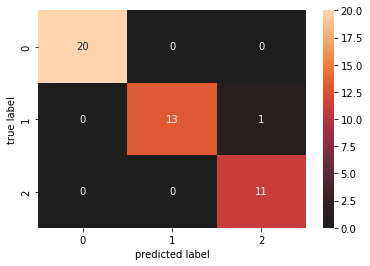

In [742]:
test_pred = clf_mlp.predict(iris_df_inp_test)
print(metrics.classification_report(iris_df_out_test, test_pred))

confusion_matrix = metrics.confusion_matrix(iris_df_out_test, test_pred)
plot_tree_cm = sns.heatmap(confusion_matrix, annot=True, center=0)
plot_tree_cm.set_xlabel('predicted label')
plot_tree_cm.set_ylabel('true label')

In [743]:
#plot the exact predictions
pred = clf_mlp.predict(iris_df_inp_test)
print("Prediction:", list(zip(*[pred, iris_df_out_test])))

proba = clf_mlp.predict_proba(iris_df_inp_test)
print("Prediction probabilities:", proba)

#plot the resulting weight matrix
print("Weights:", display([coef.shape for coef in clf_mlp.coefs_],  clf_mlp.coefs_))

Prediction: [('setosa', 'setosa'), ('virginica', 'virginica'), ('setosa', 'setosa'), ('versicolor', 'versicolor'), ('virginica', 'virginica'), ('virginica', 'virginica'), ('virginica', 'virginica'), ('setosa', 'setosa'), ('virginica', 'virginica'), ('setosa', 'setosa'), ('versicolor', 'versicolor'), ('setosa', 'setosa'), ('setosa', 'setosa'), ('setosa', 'setosa'), ('versicolor', 'versicolor'), ('virginica', 'virginica'), ('virginica', 'virginica'), ('versicolor', 'versicolor'), ('setosa', 'setosa'), ('virginica', 'versicolor'), ('setosa', 'setosa'), ('versicolor', 'versicolor'), ('virginica', 'virginica'), ('versicolor', 'versicolor'), ('setosa', 'setosa'), ('virginica', 'virginica'), ('versicolor', 'versicolor'), ('versicolor', 'versicolor'), ('setosa', 'setosa'), ('setosa', 'setosa'), ('setosa', 'setosa'), ('versicolor', 'versicolor'), ('virginica', 'virginica'), ('setosa', 'setosa'), ('virginica', 'virginica'), ('setosa', 'setosa'), ('versicolor', 'versicolor'), ('versicolor', 'vers

[(4, 4), (4, 4), (4, 3)]

[array([[-0.79438684,  0.40058305,  0.24033301, -0.16390162],
        [-0.92677552,  0.71797323,  0.57969559, -0.9075868 ],
        [ 0.59368311, -0.60875904, -0.54577257,  0.06522654],
        [ 0.68546725,  0.6222261 , -1.05363567,  0.01340164]]),
 array([[ 0.12456031, -0.40498905, -0.56643718, -0.23051083],
        [-0.04146107, -0.15609992, -0.11331122,  0.19374683],
        [-1.73078927,  1.68112059,  1.03775833, -2.3814125 ],
        [-0.58075035,  1.27607981,  0.27885178,  1.14777461]]),
 array([[-1.32989653,  1.49624711, -0.030563  ],
        [ 2.08618594, -0.41166522, -1.10810692],
        [ 0.72072649, -0.0681975 , -1.01844847],
        [-1.46584898, -1.87256753,  2.13848734]])]

Weights: None


##### a - Empirically get familiar with the MLP, so test different layer sizes on the IRIS data. What configuration results in the best accuracy?
In general I find (4,4) to be one of the bests hidden layer sizes. It performs > 90 on most random seeds.

##### b - Test different learning rates, momentum, and number of training iterations. How do these basic hyperparameters affect the convergence to a high accuracy? What values are best?
A too low learning rate means we will have to do a lot more training to get where we want. A too high however means we might not be able to converge accurately enough.

The momentum takes into account the previous weight changes allowing to faster converge especially in the beginning, where we might need to go a long way in some directions.

The number of training iterations allows us to learn more. However too much takes longer time and can lead to overfitting.

I've found 0.01 learning rate to be appropriate with 10000 iterations and 10000 batch size to allow relatively slow but controlled learning. Any smaller lead to worse performance probably because we got stuck in a local minima. Higher also performed worse probably because we took to big steps.